# Acidentes de Trânsito em Recife (com e sem vítimas) no ano de 2020

Inicialmente apenas 2020 mas a intenção é juntar com as bases dos outros anos

In [296]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [297]:
main_df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/fc1c8460-0406-4fff-b51a-e79205d1f1ab/download/acidentes_2020-novo.csv', sep=';')

In [298]:
main_df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


In [299]:
main_df.shape

(4092, 38)

In [300]:
main_df.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'descricao',
       'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

In [301]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       4092 non-null   object 
 1   hora                       4092 non-null   object 
 2   natureza_acidente          4091 non-null   object 
 3   situacao                   4091 non-null   object 
 4   bairro                     4058 non-null   object 
 5   endereco                   4079 non-null   object 
 6   numero                     2317 non-null   object 
 7   detalhe_endereco_acidente  1673 non-null   object 
 8   complemento                3614 non-null   object 
 9   bairro_cruzamento          4057 non-null   object 
 10  num_semaforo               1133 non-null   float64
 11  sentido_via                2845 non-null   object 
 12  tipo                       4092 non-null   object 
 13  descricao                  3988 non-null   objec

In [302]:
df = json.load(open('acidentes-de-transito.json', encoding='utf-8'))
campos_df = pd.DataFrame(df['metadados']['campos']).drop(['tamanho', 'valores_permitidos', 'tipo'], axis=1)
campos_df

,codigo,descricao
0,tipo,Tipo do Acidente se foi com ou sem vitimas
1,situacao,Situação do atendimento
2,data,data do atendimento
3,hora,hora do atendimento
4,bairro,Bairro do acidente
5,endereco,Endereço do acidente
6,numero,Número do acidente
7,complemento,Complemento do acidente
8,natureza,Tipo de Ocorrencia
9,descricao,Descrição do acidente


Ao revisar as colunas que não pertencem ao conjunto dos metadados e verificando o .info() do dataframe, percebi que a coluna "natureza_acidente" só possui uma linha nula. Dessa forma, ela informa existiram vítimas (fatais ou não) no acidente em casos onde as colunas "vitimas" e "vitimasfatais" não possuem valor válido.

In [303]:
to_drop = list(filter(lambda x: x not in list(campos_df['codigo']), main_df.columns))
del(to_drop[0]) #retirando a coluna "natureza_acidente" do conjunto de colunas a serem excluídas.
to_drop

['detalhe_endereco_acidente',
 'bairro_cruzamento',
 'num_semaforo',
 'sentido_via',
 'acidente_verificado',
 'tempo_clima',
 'situacao_semaforo',
 'sinalizacao',
 'condicao_via',
 'conservacao_via',
 'ponto_controle',
 'situacao_placa',
 'velocidade_max_via',
 'mao_direcao',
 'divisao_via1',
 'divisao_via2',
 'divisao_via3']

In [304]:
main_df = main_df.drop(to_drop, axis=1)

In [305]:
main_df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,complemento,tipo,descricao,...,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,EM FRENTE A IGREJA UNIVERSAL,COLISÃO,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,NaN,ABALROAMENTO LONGITUDINAL,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,CHOQUE VEÍCULO PARADO,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,COLISÃO TRASEIRA,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,ABALROAMENTO TRANSVERSAL,COLISÃOENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


#### Verificando elementos faltantes

In [306]:
# Quantidade de elementos faltantes por coluna
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       1
situacao                1
bairro                 34
endereco               13
numero               1775
complemento           478
tipo                    0
descricao             104
auto                  608
moto                 2400
ciclom               4073
ciclista             3940
pedestre             3937
onibus               3601
caminhao             3797
viatura              4020
outros               4032
vitimas                14
vitimasfatais        4071
dtype: int64

In [307]:
main_df['natureza_acidente'].value_counts()

SEM VÍTIMA      2317
COM VÍTIMA      1754
VÍTIMA FATAL      20
Name: natureza_acidente, dtype: int64

In [308]:
def getVitimas(x):
    if x == "VÍTIMA FATAL":
        return 1
    elif x == "COM VÍTIMA":
        return 1
    else:
        return 0

def getVitimasFatais(x):
    if x == "VÍTIMA FATAL":
        return 1
    else:
        return 0

In [309]:
# main_df['vitimas'] = main_df['natureza_acidente'].apply(getVitimas)
# main_df['vitimasfatais'] = main_df['natureza_acidente'].apply(getVitimasFatais)

In [310]:
main_df = main_df[main_df['natureza_acidente'].notna()]

In [311]:
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       0
situacao                0
bairro                 34
endereco               13
numero               1774
complemento           478
tipo                    0
descricao             104
auto                  608
moto                 2399
ciclom               4072
ciclista             3939
pedestre             3936
onibus               3601
caminhao             3796
viatura              4019
outros               4031
vitimas                13
vitimasfatais        4070
dtype: int64

Como na coluna de bairros existem apenas 34 elementos sem valor, optei por remover essas linhas do dataframe

In [312]:
main_df = main_df[main_df['bairro'].notna()]
main_df.shape

(4057, 21)

In [313]:
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       0
situacao                0
bairro                  0
endereco               12
numero               1755
complemento           471
tipo                    0
descricao             102
auto                  605
moto                 2368
ciclom               4038
ciclista             3905
pedestre             3902
onibus               3572
caminhao             3766
viatura              3985
outros               3997
vitimas                13
vitimasfatais        4036
dtype: int64

In [314]:
main_df = main_df.drop(['endereco', 'numero', 'complemento', 'descricao', 'situacao'], axis=1)

Pela descrição da base e observando seus valores, percebe-se que nas colunas referentes ao tipo de envolvido em um acidente, o elemento faltante significa que não houve envolvimento no acidente. Dessa forma, elementos faltantes serão substituidos por 0.

In [315]:
for col in ['auto','moto','ciclom', 'ciclista','pedestre','onibus','caminhao','viatura', 'outros']:
    main_df[col].fillna(0, inplace=True)

In [316]:
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       0
bairro                  0
tipo                    0
auto                    0
moto                    0
ciclom                  0
ciclista                0
pedestre                0
onibus                  0
caminhao                0
viatura                 0
outros                  0
vitimas                13
vitimasfatais        4036
dtype: int64

In [317]:
main_df.dtypes

data                  object
hora                  object
natureza_acidente     object
bairro                object
tipo                  object
auto                 float64
moto                 float64
ciclom               float64
ciclista             float64
pedestre             float64
onibus               float64
caminhao             float64
viatura              float64
outros               float64
vitimas              float64
vitimasfatais        float64
dtype: object

In [318]:
main_df['bairro'] = main_df['bairro'].astype('category')
main_df['tipo'] = main_df['tipo'].astype('category')
main_df['natureza_acidente'] = main_df['natureza_acidente'].astype('category')

In [319]:
main_df['tipo'].value_counts()

COLISÃO                      996
ABALROAMENTO LONGITUDINAL    955
COLISÃO TRASEIRA             663
ABALROAMENTO TRANSVERSAL     636
COLISÃO FRONTAL              150
ATROPELAMENTO                148
CHOQUE OBJETO FIXO           146
COLISÃO COM CICLISTA         140
CHOQUE VEÍCULO PARADO        100
TOMBAMENTO                    39
CHOQUE                        31
ENGAVETAMENTO                 23
CAPOTAMENTO                   13
ACID. DE PERCURSO             11
ATROPELAMENTO ANIMAL           6
Name: tipo, dtype: int64

In [320]:
import datetime
def getMonth(x):
    data=datetime.datetime.strptime(x, "%Y-%m-%d")
    return data.strftime("%B")

main_df['mes'] = main_df['data'].apply(getMonth)

In [321]:
main_df

,data,hora,natureza_acidente,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,mes
0,2020-01-01,00:39:00,SEM VÍTIMA,ÁGUA FRIA,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
1,2020-01-01,01:04:00,SEM VÍTIMA,CORDEIRO,ABALROAMENTO LONGITUDINAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
2,2020-01-01,02:16:00,SEM VÍTIMA,AREIAS,CHOQUE VEÍCULO PARADO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
3,2020-01-01,02:22:00,SEM VÍTIMA,BOA VIAGEM,COLISÃO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
4,2020-01-01,03:33:00,SEM VÍTIMA,PAISSANDU,ABALROAMENTO TRANSVERSAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2020-12-30,17:30:00,SEM VÍTIMA,DERBY,COLISÃO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,December
4088,2020-12-30,18:57:00,SEM VÍTIMA,ARRUDA,COLISÃO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,December
4089,2020-12-30,20:38:00,COM VÍTIMA,MANGABEIRA,ATROPELAMENTO,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,December
4090,2020-12-31,15:47:00,COM VÍTIMA,CASA AMARELA,COLISÃO FRONTAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,December


In [322]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
auto,4057.0,1.252157,0.786512,0.0,1.0,1.0,2.0,6.0
moto,4057.0,0.452305,0.567231,0.0,0.0,0.0,1.0,3.0
ciclom,4057.0,0.004683,0.068282,0.0,0.0,0.0,0.0,1.0
ciclista,4057.0,0.037959,0.193684,0.0,0.0,0.0,0.0,2.0
pedestre,4057.0,0.042149,0.227429,0.0,0.0,0.0,0.0,5.0
onibus,4057.0,0.121518,0.333490,0.0,0.0,0.0,0.0,3.0
caminhao,4057.0,0.073453,0.267444,0.0,0.0,0.0,0.0,2.0
viatura,4057.0,0.017994,0.134786,0.0,0.0,0.0,0.0,2.0
outros,4057.0,0.015282,0.126644,0.0,0.0,0.0,0.0,2.0
vitimas,4044.0,0.516320,0.660897,0.0,0.0,0.0,1.0,5.0


In [323]:
main_df['mes'] = main_df['mes'].astype('category')
main_df.dtypes

data                   object
hora                   object
natureza_acidente    category
bairro               category
tipo                 category
auto                  float64
moto                  float64
ciclom                float64
ciclista              float64
pedestre              float64
onibus                float64
caminhao              float64
viatura               float64
outros                float64
vitimas               float64
vitimasfatais         float64
mes                  category
dtype: object

### Visualização

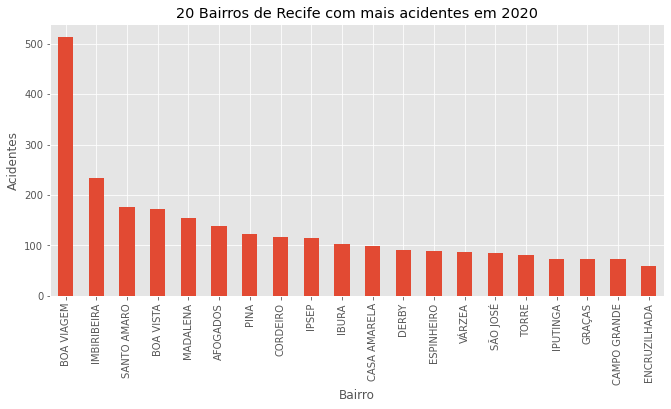

In [324]:
main_df['bairro'].value_counts().head(20).plot(kind='bar', figsize=(11,5))
plt.title("20 Bairros de Recife com mais acidentes em 2020")
plt.xlabel("Bairro")
plt.ylabel("Acidentes")

plt.show()

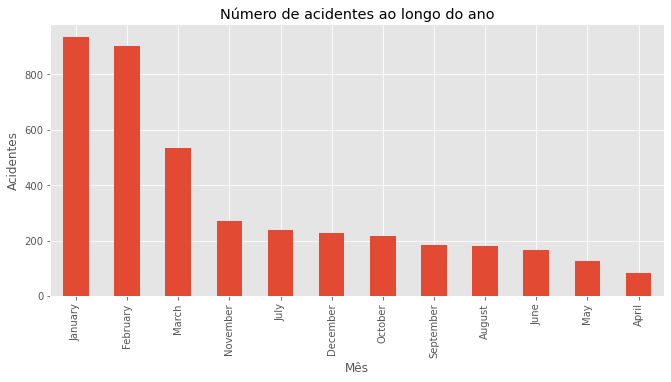

In [325]:
main_df['mes'].value_counts().plot(kind='bar', figsize=(11,5))
plt.title("Número de acidentes ao longo do ano")
plt.xlabel("Mês")
plt.ylabel("Acidentes")

plt.show()

### MAIN TODO:
    - Organizar as colunas de vítimas e vítimas fatais
    - criar visualização para tipo de acidente
    - procurar novos dados para adicionar
    - Adicionar datasets dos outros anos disponíveis

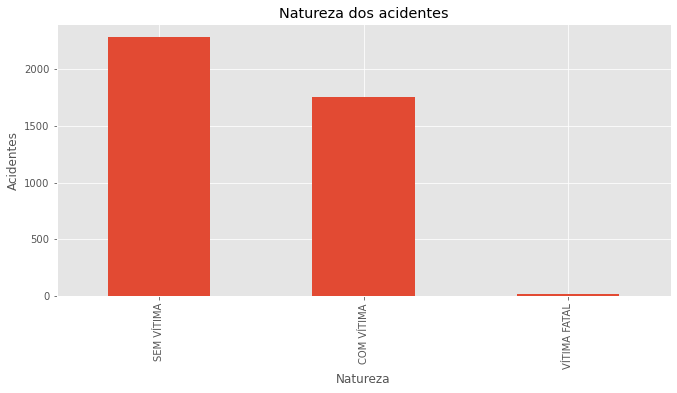

In [326]:
main_df['natureza_acidente'].value_counts().plot(kind='bar', figsize=(11,5))
plt.title("Natureza dos acidentes")
plt.xlabel("Natureza")
plt.ylabel("Acidentes")

plt.show()

# mapa geojson

http://dados.recife.pe.gov.br/dataset/c1f100f0-f56f-4dd4-9dcc-1aa4da28798a/resource/e43bee60-9448-4d3d-92ff-2378bc3b5b00/download/bairros.geojson

In [335]:
import folium 
from branca.colormap import linear

In [345]:
# We import the geoJSON file. 
with open('Mapa/bairros.json', 'r', encoding='utf-8-sig') as f:
    maprecife = json.load(f)

In [346]:
recifediv = folium.Map(location=[-8.05428, -34.8813],tiles='OpenStreetMap', zoom_start=12)
folium.GeoJson(
    maprecife
).add_to(recifediv)
recifediv

In [347]:
from unidecode import unidecode

def removeAcentuacao(x):
    return unidecode(x)

main_df['bairro'] = main_df['bairro'].apply(removeAcentuacao)

In [348]:
serie_acidentes_bairro = main_df['bairro'].value_counts()
acidentes_por_bairro = pd.DataFrame({'bairro':serie_acidentes_bairro.index, 'acidentes':serie_acidentes_bairro.values}) 

In [349]:
recife = folium.Map(location=[-8.05428, -34.8813],tiles='OpenStreetMap', zoom_start=12)

In [350]:
folium.Choropleth(
    geo_data=maprecife,
    data=acidentes_por_bairro,
    columns=["bairro", "acidentes"],
    key_on="feature.properties.bairro_nome_ca",
    legend_name="Acidentes por Bairro",
    highlight=True,
    fill_color="OrRd",
).add_to(recife)

In [351]:
recife